In [1]:
import numpy as np
import sys
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers import BatchNormalization as B_nor
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

2025-03-11 14:55:05.750721: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 14:55:05.755909: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-11 14:55:05.773194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741726505.803839 1329074 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741726505.812545 1329074 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
training_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_matriz.npy" ### "Input data npy file" 
x_sample = np.load ( training_set )
x_train = x_sample.reshape ((x_sample.shape[0], 100, 100,1)) # No. de muestras, Longitud, Ancho, No. de filtros

training_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_entrenamiento_TCGA_etiquetas.npy" ### "Input label npy file" 
y_label = np.load ( training_label )
y_train = to_categorical(y_label, num_classes=12)

In [3]:
# Carga de datos de validacion
testing_set = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_matriz.npy"
test_sample = np.load ( testing_set )
x_test = test_sample.reshape ( (test_sample.shape[0], 100, 100, 1) ) # no. of samples, x pixels, y pixels, no. of files

# Carga de etiquetas de datos de validacion
testing_label = sys.argv[0] = "/home/arthur1/Documentos/GitHub/Prueba/Datos/Salida/Datos_validacion_TCGA_etiquetas.npy"
test_label = np.load ( testing_label )
test_label_compare = test_label
y_test = to_categorical (test_label,num_classes=12 )

In [4]:
model = keras.Sequential([
layers.Conv2D(filters=64,kernel_size=(5,5),input_shape=(100,100,1)),
layers.BatchNormalization(axis=2,epsilon=1e-5),
layers.MaxPool2D(pool_size=(2,2),padding=("same")),

layers.Conv2D(filters=64,kernel_size=(3,3)),
layers.BatchNormalization(axis=2,epsilon=1e-5),
layers.MaxPool2D(pool_size=(2,2),padding=("same")),

layers.Conv2D(filters=64,kernel_size=(3,3)),
layers.BatchNormalization(axis=2,epsilon=1e-5),
layers.MaxPool2D(pool_size=(2,2),padding=("same")),

layers.Flatten(),
layers.Dense(1000, activation='relu'),
layers.Dense(600, activation='relu'),
layers.Dense(80, activation='relu'),
layers.Dense(12, activation='softmax')

])

/home/arthur1/Documentos/GitHub/Prueba/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-11 14:55:10.973886: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 64)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 46, 64)     │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     7,745,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 600)            │       600,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │        48,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           972 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,470,824 (32.31 MB)

 Trainable params: 8,470,498 (32.31 MB)

 Non-trainable params: 326 (1.27 KB)

In [6]:
Adam = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(optimizer=Adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
num_epochs=60
train_history = model.fit ( x_train, y_train, # Se cargan los datos de entrenamiento y etiquetas
                            #validation_data=(x_test,y_test), #Se utiliza para reservar un 25% de datos para la validacion
                            validation_split=0.25,
                            epochs = num_epochs, #Numero de epocas de entrenamiento
                 batch_size = 24, verbose = 1 )

Epoch 1/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 24s 485ms/step - accuracy: 0.2794 - loss: 2.1975 - val_accuracy: 0.4332 - val_loss: 1.7733
Epoch 2/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 473ms/step - accuracy: 0.6539 - loss: 1.1732 - val_accuracy: 0.7883 - val_loss: 1.1078
Epoch 3/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 474ms/step - accuracy: 0.8738 - loss: 0.4742 - val_accuracy: 0.9121 - val_loss: 0.6481
Epoch 4/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 468ms/step - accuracy: 0.9181 - loss: 0.2592 - val_accuracy: 0.9186 - val_loss: 0.4659
Epoch 5/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 472ms/step - accuracy: 0.9257 - loss: 0.2547 - val_accuracy: 0.9218 - val_loss: 0.3564
Epoch 6/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 462ms/step - accuracy: 0.9424 - loss: 0.1773 - val_accuracy: 0.9381 - val_loss: 0.2892
Epoch 7/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 473ms/step - accuracy: 0.9703 - loss: 0.1203 - val_accuracy: 0.9446 - val_loss: 0.2341
Epoch 8/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 19s 482ms/step - accuracy: 0.9749 - loss: 0.0787 - val_accu

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 96, 96, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 96, 96, 64)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 46, 46, 64)     │           184 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 21, 21, 64)     │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │     7,745,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 600)            │       600,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 80)             │        48,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 12)             │           972 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,411,822 (96.94 MB)

 Trainable params: 8,470,498 (32.31 MB)

 Non-trainable params: 326 (1.27 KB)

 Optimizer params: 16,940,998 (64.62 MB)

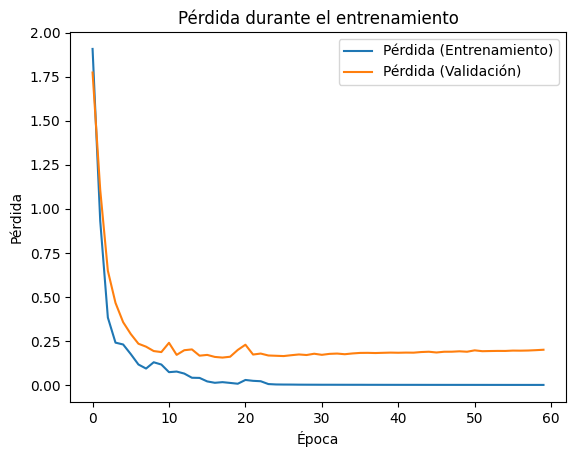

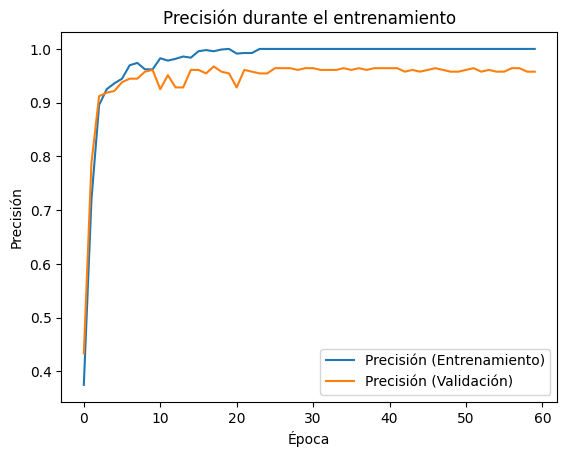

In [9]:
import matplotlib.pyplot as plt# Gráfico de la pérdida


plt.plot(train_history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(train_history.history['val_loss'], label='Pérdida (Validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.legend()
plt.show()

# Gráfico de la precisión

plt.plot(train_history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(train_history.history['val_accuracy'], label='Precisión (Validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el entrenamiento')
plt.legend()
plt.show()

In [10]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)
Epocas = num_epochs
#Calcular el MCC              MCC = (TP * TN - FP * FN) / sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
y_pred = model.predict(x_test) # o x_test
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)
num_classes = cm.shape[0]
mcc_per_class = []
for i in range(num_classes):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    tn = np.sum(cm) - (tp + fp + fn)
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
        mcc_per_class.append(0)
    else:
        mcc_per_class.append(numerator / denominator)
mcc = np.mean(mcc_per_class)
print("MCC:", mcc)

# Calculo de precision
# Calcular precisión micro
precision_micro = precision_score(y_true_classes, y_pred_classes, average='micro')
print("Precisión micro (Prueba):", precision_micro)

# Calcular precisión macro
precision_macro = precision_score(y_true_classes, y_pred_classes, average='macro')
print("Precisión macro (Prueba):", precision_macro)

# Calcular precisión ponderada
precision_weighted = precision_score(y_true_classes, y_pred_classes, average='weighted')
print("Precisión ponderada (Prueba):", precision_weighted)

# Calcular precisión por clase
precision_per_class = precision_score(y_true_classes, y_pred_classes, average=None)
print("Precisión por clase (Prueba):", precision_per_class)

154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.9557 - loss: 0.1797
Loss: 0.17069987952709198
Accuracy: 0.9568052291870117
154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step
MCC: 0.9494007189942963
Precisión micro (Prueba): 0.9568052159739201
Precisión macro (Prueba): 0.9525989857013298
Precisión ponderada (Prueba): 0.9586268791952941
Precisión por clase (Prueba): [0.82681564 0.99671772 0.95294118 0.92677346 1.         0.99501247
 0.9060241  0.97959184 0.94642857 0.97333333 0.99137931 0.93617021]


In [11]:
# Obtener las predicciones
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

154/154 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

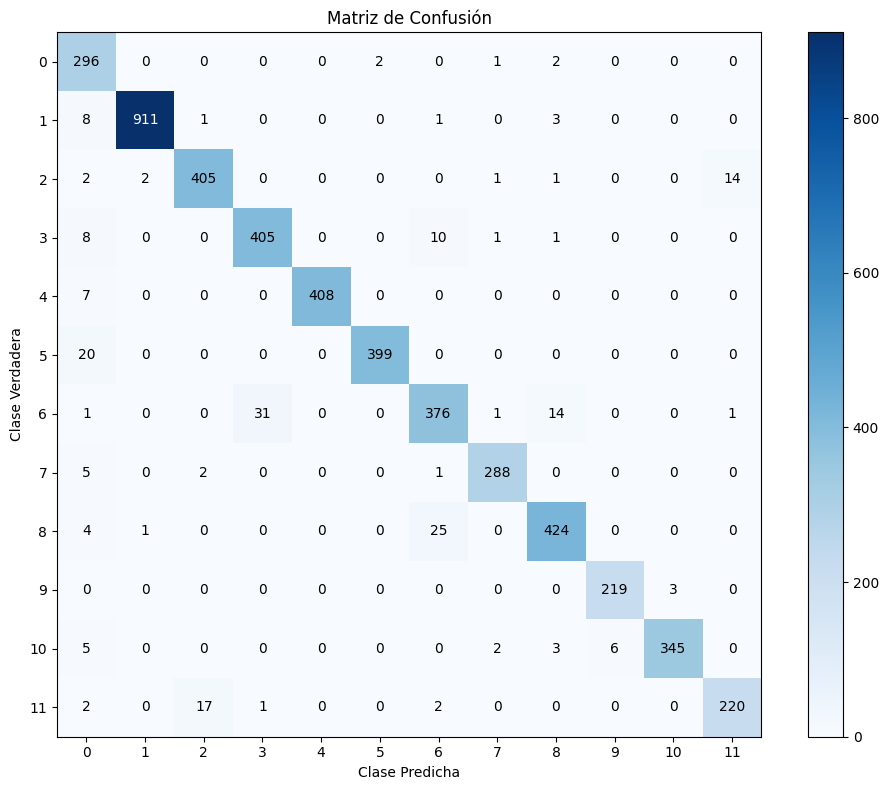

In [13]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
tick_marks = np.arange(12)
plt.xticks(tick_marks, range(12))
plt.yticks(tick_marks, range(12))
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Verdadera')

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()